In [ ]:
# Using the csv file at (https://github.com/vz-risk/VCDB/tree/master/data/csv) which was basically a master incident
# file for all reported cyber incidents I used two claasification approaches followed by clustering the data for
# more structure. There were many json files present for each individual incident at ( https://github.com/vz-risk/VCDB/tree/master/data/json) which
# I felt would would be too sparse for my approach.

# The csv file I originally downloaded had many unnecessary features for my purpose. It had upto 100+ columns with 5701
# rows as seen below.

In [27]:
import pandas

csvfile = "vcdb_org.csv"
dataset = pandas.read_csv(csvfile, names=names)


In [ ]:
#I removed most features from the csv file simply by using Excel and I reduced it to the following form with the 
# following features :-
# 
#
#1. year -> 20xx
#2. victim.state -> US states
# 
#3. action.Malware -> Incident symptom [TRUE/FALSE value reduced to 1/0 value]
#4. action.Hacking -> Incident symptom [TRUE/FALSE value reduced to 1/0 value]
#5. action.Social -> Incident symptom [TRUE/FALSE value reduced to 1/0 value]
#6. action.Physical -> Incident symptom [TRUE/FALSE value reduced to 1/0 value]
#7. action.Misuse -> Incident symptom [TRUE/FALSE value reduced to 1/0 value]
#8. action.Error -> Incident symptom [TRUE/FALSE value reduced to 1/0 value]
#9. action.Environmental -> Incident symptom [TRUE/FALSE value reduced to 1/0 value]
#10. action.Unknown -> Incident symptom [TRUE/FALSE value reduced to 1/0 value]
#
#11. victim.industry.name -> {{ Public ,Healthcare , Information , Utilities , Other Services , Finance , Manufacturing 
#   Educational , Professional , Accomodation , Retail , Administrative ,Unknown , Transportation , Trade ,Real Estate,
#   Management , Construction , Mining , Entertainment , Agriculture }}
#
#12. pattern - > {{ Privilege Misuse , Lost and Stolen Assets , Web Applications , Miscellaneous Errors , 
#                   Cyber-Espionage , Denial of Service , Everything Else , Payment Card Skimmers , Crimeware
#                    Point of Sale
#                }}

In [26]:
import pandas

csvfile = "vcdb.csv"
dataset = pandas.read_csv(csvfile, names=names)


In [ ]:
# The following script tries to classify the method involved in the incident with the domain of the industry involved.
# I wanted to see if there was any correlation with the methods used with any one business domain.
# I used the following table to assign integer values to the industries involved.

'''
Public 	1
Healthcare 	2
Information 	3
Utilities 	4
Other Services 	5
Finance 	6
Manufacturing 	7
Educational 	8
Professional 	9
Accomodation 	10
Retail 	11
Administrative 	12
Unknown	13
Transportation 	14
Trade 	15
Real Estate 	16
Management 	17
Construction 	18
Mining 	19
Entertainment 	20
Agriculture 	21

'''

# the target set was 
#    pattern - > {{ Privilege Misuse , Lost and Stolen Assets , Web Applications , Miscellaneous Errors , 
#                   Cyber-Espionage , Denial of Service , Everything Else , Payment Card Skimmers , Crimeware
#                    Point of Sale
#                }}

# I split the dataset into a training set and data validation set using a 15-fold on the given dataset.
# I also applied a K nearest neighbours classifier for a dry run to check the confusion matrix.

LR: 0.780451 (0.015171)
LDA: 0.779198 (0.015181)
KNN: 0.764662 (0.022457)
TREE: 0.794486 (0.012631)
NB: 0.500251 (0.015171)
SVM: 0.780451 (0.015898)


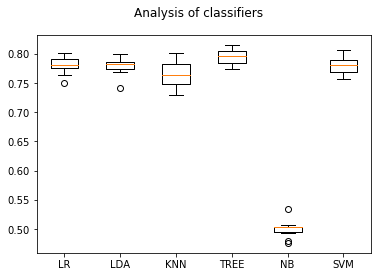

0.75511396844
[[ 30   7   0   0   0   1   0   5   0   2]
 [  3  56   0   6   0   0   0   0   0   7]
 [  0   0   3  34   0   0   0   0   0  15]
 [  3   1   2 156  13   0   0   4   3  60]
 [  0   0   0   0 240  84   8   0   0   0]
 [  0   0   0   0   0 392   0   0   0   0]
 [  0   0   0   0  25   0   7   0   0   0]
 [  1   0   0   2   1   0   0  14   0   1]
 [  0   1   0   0   0   1   0   0 315   0]
 [  1   9  13 101   0   1   0   4   0  79]]
                        precision    recall  f1-score   support

             Crimeware       0.79      0.67      0.72        45
       Cyber-Espionage       0.76      0.78      0.77        72
     Denial of Service       0.17      0.06      0.09        52
       Everything Else       0.52      0.64      0.58       242
Lost and Stolen Assets       0.86      0.72      0.79       332
  Miscellaneous Errors       0.82      1.00      0.90       392
 Payment Card Skimmers       0.47      0.22      0.30        32
         Point of Sale       0.52      0.7

In [4]:
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


csvfile = "vcdb1.csv"
names = [ 'action.Malware' ,   'action.Hacking' ,   'action.Social' ,   'action.Physical' ,   'action.Misuse' ,   'action.Error' ,   'action.Environmental' ,  'action.Unknown' ,   'victim.industry.name', 'pattern' ]
dataset = pandas.read_csv(csvfile, names=names)
array = dataset.values
X = array[:,0:9]
Y = array[:,9]
validation_size = 0.15
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
scoring = 'accuracy'

models  = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('TREE', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []

for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)


fig = plt.figure()
fig.suptitle('Analysis of classifiers')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


In [ ]:
# As you can see the highest accuracy for the methods is using the Decision Tree classifier. So I implemented a 
# decision tree classifier.

In [11]:
import pandas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

url = "vcdb1.csv"
names = [ 'action.Malware' ,   'action.Hacking' ,   'action.Social' ,   'action.Physical' ,   'action.Misuse' ,   'action.Error' ,   'action.Environmental' ,  'action.Unknown' ,   'victim.industry.name', 'pattern' ]
dataset = pandas.read_csv(url, names=names)
array = dataset.values
X = array[:5001,0:9]
Y = array[:5001,9]
test_idx = array[5001:5701,0:9]

clf = DecisionTreeClassifier()
clf.fit(X,Y)

predictions = clf.predict(test_idx)
#print predictions
print(accuracy_score(array[5001:5701,9], predictions))
print(confusion_matrix( array[5001:5701,9], predictions))
print(classification_report(array[5001:5701,9], predictions))

0.797142857143
[[ 14   0   0   1   1   0   0   2   0   0]
 [  0  16   0   0   0   0   0   0   0   2]
 [  0   0   0   2   0   0   0   0   0  16]
 [  1   1   0  57   4   0   3   1   0  35]
 [  0   0   0   0 109  33   2   0   0   0]
 [  0   0   0   0   0 180   0   0   0   0]
 [  0   0   0   0   9   0   5   0   0   0]
 [  1   0   0   4   0   0   0   7   0   1]
 [  0   0   0   0   0   0   0   0 103   0]
 [  1   1   0  18   0   1   0   0   2  67]]
                        precision    recall  f1-score   support

             Crimeware       0.82      0.78      0.80        18
       Cyber-Espionage       0.89      0.89      0.89        18
     Denial of Service       0.00      0.00      0.00        18
       Everything Else       0.70      0.56      0.62       102
Lost and Stolen Assets       0.89      0.76      0.82       144
  Miscellaneous Errors       0.84      1.00      0.91       180
 Payment Card Skimmers       0.50      0.36      0.42        14
         Point of Sale       0.70      0.

/Users/Vishnu/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
# With an accuracy of ~80% I decided changing the model to a clustering paradigm. I used K means to glean some 
# structure of the data. I decided to use just two features, namely Victim's Industry and the Attack Pattern with the
# following numerical codes.
'''
Public 	1
Healthcare 	2
Information 	3
Utilities 	4
Other Services 	5
Finance 	6
Manufacturing 	7
Educational 	8
Professional 	9
Accomodation 	10
Retail 	11
Administrative 	12
Unknown	13
Transportation 	14
Trade 	15
Real Estate 	16
Management 	17
Construction 	18
Mining 	19
Entertainment 	20
Agriculture 	21

'''

'''
Privilege Misuse	1
Lost and Stolen Assets	2
Web Applications	3
Miscellaneous Errors	4
Cyber-Espionage	5
Denial of Service	6
Everything Else	7
Payment Card Skimmers	8
Crimeware	9
Point of Sale	10
'''


In [12]:
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans

url = "vcdb3.csv"
names = [ 'victim.industry.name', 'pattern' ]
dataset = pandas.read_csv(url, names=names)
array = dataset.values

kmeans = KMeans(n_clusters = 10)
kmeans.fit(array)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print centroids
print labels

[[  1.18396226   4.00314465]
 [  8.56777494   2.66240409]
 [ 12.51869159   2.53037383]
 [  2.06748466   7.07157464]
 [ 11.87407407   7.9037037 ]
 [  6.00793651   2.48214286]
 [  1.64092664   1.56241956]
 [  6.86556604   7.19339623]
 [ 18.4          4.29      ]
 [  2.99628253   3.28624535]]
[6 6 6 ..., 1 6 0]


In [ ]:
# Now I wanted to plot the clusters using the following script.

Size = 10 Avg. silhouette score: 0.542094550464


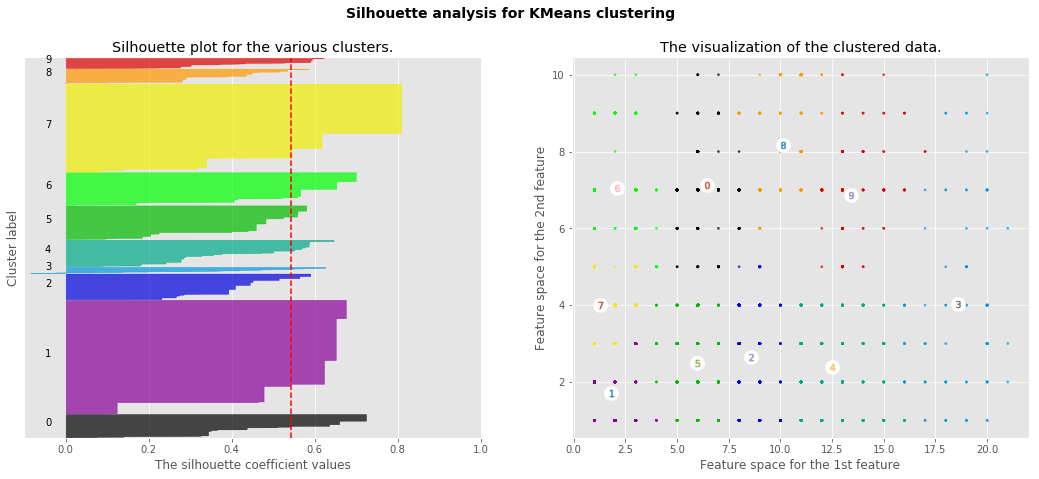

In [24]:
from __future__ import print_function
import pandas
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


cluster_size_range = [10]
csvfile = "vcdb3.csv"
columns = [ 'victim.industry.name', 'pattern' ]
dataset = pandas.read_csv(csvfile, names=columns)
data_array = dataset.values


for clustersize in cluster_size_range:
    graph, (axis_1, axis_2) = plt.subplots(1, 2)
    graph.set_size_inches(18, 7)

    axis_1.set_xlim([-0.1, 1])
    axis_1.set_ylim([1, len(data_array) + (clustersize + 1) * 10])


    kmeans = KMeans(n_clusters = clustersize, init='k-means++', max_iter=500,tol=0.0001)
    clusters = kmeans.fit_predict(data_array)

    silhouette_avg = silhouette_score(data_array, clusters)
    print("Size =", clustersize,
          "Avg. silhouette score:", silhouette_avg)

    sil_vals = silhouette_samples(data_array, clusters)

    y_lower = 10
    for i in range(clustersize):
        clust_vals = sil_vals[clusters == i]
        clust_vals.sort()
        clustersize_cluster_i = clust_vals.shape[0]
        y_upper = y_lower + clustersize_cluster_i
        color = cm.spectral(float(i) / clustersize)
        axis_1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, clust_vals,
                          facecolor=color, edgecolor=color, alpha=0.7)

        axis_1.text(-0.05, y_lower + 0.5 * clustersize_cluster_i, str(i))
        y_lower = y_upper + 10

    axis_1.set_title("Silhouette plot for the various clusters.")
    axis_1.set_xlabel("The silhouette coefficient values")
    axis_1.set_ylabel("Cluster label")

    axis_1.axvline(x=silhouette_avg, color="red", linestyle="--")


    axis_1.set_yticks([])
    axis_1.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    
    
    colors = cm.spectral(clusters.astype(float) / clustersize)
    axis_2.scatter(data_array[:, 0], data_array[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    centers = kmeans.cluster_centers_
    axis_2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        axis_2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    axis_2.set_title("The visualization of the clustered data.")
    axis_2.set_xlabel("Feature space for the 1st feature")
    axis_2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering"),
                 fontsize=14, fontweight='bold')

    plt.show()



In [23]:
# From the visualization we can see some strong correlation between some industries and the kind of cyber incidents 
# that have afflicted them.

# for example from the 2nd graph
# cluster 1 - shows a strong correlation between 
# Y-AXIS { Privilege Misuse , Lost and Stolen Assets }  -> X-AXIS {  Public , Healthcare }